<a href="https://colab.research.google.com/github/Yoon2596/kita_2404/blob/main/m5_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/%EA%B3%BC%EC%A0%9C/%EA%B3%BC%EC%A0%9C_0723.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task1_0723. 'Breast Cancer Wisconsin (Diagnostic) Data Set'을 사용하여 이진 분류 문제를 해결하고, 평가 지표(정확도, 정밀도, 재현율, F1 스코어, ROC AUC)를 계산하세요.

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
# 데이터 로드
data = load_breast_cancer()

dt = pd.DataFrame(data.data, columns=data.feature_names)
# dt.columns = data.feature_names
# print(dt.columns)
dt.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
dt.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score
import numpy as np
import pandas as pd

# 데이터 로드
data = load_breast_cancer()

X, y = data.data, data.target

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_clf = LogisticRegression(max_iter=10000) # max_iter 증가하여 수렴 문제 방지
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

def get_clf_eval(y_test, pred, pred_proba):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1 : {3:.4f}, AUC : {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[39  4]
 [ 1 70]]
정확도: 0.9561, 정밀도: 0.9459, 재현율: 0.9859, F1 : 0.9655, AUC : 0.9977


In [ ]:
# 강사님 버전
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score
import numpy as np
import pandas as pd

# 데이터 로드
data = load_breast_cancer()

X, y = data.data, data.target

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def get_clf_eval(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    pred_proba = model.predict_proba(X_test)[:,1]

    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1 : {3:.4f}, AUC : {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

# 여러 모델 훈련 및 평가
models = {
    'LogisticRegression': LogisticRegression(max_iter=500, solver='lbfgs', random_state=42),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    'Support Vector Machine' : SVC(probability=True, random_state=42)
    # probability=True는 확률 값을 반환하게 하여 predict_proba 메서드를 사용할 수 있게 함
}
for model_name, model in models.items():
    print(f'[{model_name}]')
    get_clf_eval(model, X_train, X_test, y_train, y_test)
    print()

[LogisticRegression]
오차 행렬
[[41  2]
 [ 1 70]]
정확도: 0.9737, 정밀도: 0.9722, 재현율: 0.9859, F1 : 0.9790, AUC : 0.9974

[DecisionTreeClassifier]
오차 행렬
[[40  3]
 [ 3 68]]
정확도: 0.9474, 정밀도: 0.9577, 재현율: 0.9577, F1 : 0.9577, AUC : 0.9440

[RandomForestClassifier]
오차 행렬
[[40  3]
 [ 1 70]]
정확도: 0.9649, 정밀도: 0.9589, 재현율: 0.9859, F1 : 0.9722, AUC : 0.9953

[Support Vector Machine]
오차 행렬
[[41  2]
 [ 0 71]]
정확도: 0.9825, 정밀도: 0.9726, 재현율: 1.0000, F1 : 0.9861, AUC : 0.9974



average 매개변수에는 여러 가지 옵션이 있으며, 각 옵션은 다중 클래스 데이터에 대한 정밀도를 계산하는 다른 방법을 제공

[ average 매개변수 옵션 ]
- average='macro':
각 클래스의 정밀도를 개별적으로 계산한 후, 단순 평균을 구합니다.
모든 클래스가 동일하게 가중치를 부여받습니다.
클래스 간 불균형이 있을 때 유용합니다.
- average='micro':
전체 TP, FP, FN을 합쳐서 정밀도를 계산합니다.
모든 샘플을 개별적으로 동일하게 취급한다.
- average='weighted':
각 클래스의 정밀도를 개별적으로 계산한 후, 클래스별 샘플 수로 가중 평균을 구합니다.
클래스의 샘플 수에 따라 가중치를 부여합니다.
- average='samples' (다중 레이블 분류에 사용됨):
각 샘플에 대해 개별적으로 메트릭을 계산한 후 평균을 구합니다.
- average=None:
각 클래스별로 정밀도를 반환합니다. 다중 클래스 분류에서 각 클래스에 대한 정밀도를 별도로 얻을 수 있습니다.


Task2_0723.
가상의 데이터셋을 생성하고, 이를 사용하여 다중 클래스 분류 모델을 훈련시킨 후 평가 지표를 계산하세요. 평가 지표는 정확도, 정밀도, 재현율, F1 스코어, ROC AUC입니다.

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize

# 데이터 생성 (5개의 클래스)
X, y = make_classification(n_samples=1500, n_features=20, n_classes=5, n_informative=15, random_state=42)
print(X.shape)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 초기화 및 학습
lr_clf = RandomForestClassifier(random_state=42)
lr_clf.fit(X_train, y_train)

# 예측 및 확률 계산
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)

# 다중 클래스 라벨을 이진화
pred_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3, 4])

# 평가 지표 계산
def get_clf_eval(y_test, pred, pred_proba):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='macro')
    recall = recall_score(y_test, pred, average='macro')
    f1 = f1_score(y_test, pred, average='macro')
    # ROC-AUC 추가
    roc_auc_ovr = roc_auc_score(pred_test_binarized, pred_proba, multi_class='ovr')
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1 : {3:.4f}, AUC : {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc_ovr))

get_clf_eval(y_test, pred, pred_proba)


(1500, 20)
오차 행렬
[[52  6  2  7  1]
 [ 1 46  2  0  5]
 [ 0  6 49  2  2]
 [ 5  2  4 46  6]
 [ 5  4  2  1 44]]
정확도: 0.7900, 정밀도: 0.7909, 재현율: 0.7926, F1 : 0.7898, AUC : 0.9481


Task3_0723. 훈련을 개선 시키세요

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income']
data_org = pd.read_csv(url, header=None, names=columns, na_values='?', skipinitialspace=True)

In [ ]:
data = data_org.copy()

# 2. 계측치 처리
data.dropna(inplace=True)

# 3. 이상치 제거 (여기서는 'capital-gain' 과 'capital-loss'에서 극단적인 값들을 이상치로 가정)
Q1 = data['capital-gain'].quantile(0.25)
Q3 = data['capital-gain'].quantile(0.75)
IQR = Q3 - Q1

capital_gain_outliers = data[(data['capital-gain'] < Q1 - 1.5 * IQR) | (data['capital-gain'] > Q3 + 1.5 * IQR)]
print(capital_gain_outliers)

Q1 = data['capital-loss'].quantile(0.25)
Q3 = data['capital-loss'].quantile(0.75)
IQR = Q3 - Q1

capital_loss_outliers = data[(data['capital-loss'] < Q1 - 1.5 * IQR) | (data['capital-loss'] > Q3 + 1.5 * IQR)]
print(capital_loss_outliers)

data = data.drop(capital_gain_outliers.index)
data = data.drop(capital_loss_outliers.index)

# 4. 파생변수 작성
data['capital_diff'] = data['capital-gain'] - data['capital-loss']

       age         workclass  fnlwgt    education  education-num  \
0       39         State-gov   77516    Bachelors             13   
8       31           Private   45781      Masters             14   
9       42           Private  159449    Bachelors             13   
59      30           Private  188146      HS-grad              9   
60      30           Private   59496    Bachelors             13   
...    ...               ...     ...          ...            ...   
32515   66       Federal-gov   47358         10th              6   
32518   57         Local-gov  110417      HS-grad              9   
32538   38           Private  139180    Bachelors             13   
32548   65  Self-emp-not-inc   99359  Prof-school             15   
32560   52      Self-emp-inc  287927      HS-grad              9   

           marital-status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
8           Never-married  

In [ ]:
# 'age' 컬럼의 이상치를 평균값으로 대체
age_mean = data['age'].mean()
data['age'] = data['age'].apply(lambda x : x if x <= 74 else age_mean)

# 'education-num' 컬럼의 이상치를 평균값으로 대체
education_num_mean = data['education-num'].mean()
data['education-num'] = data['education-num'].apply(lambda x : x if x >= 5 else education_num_mean)

<Figure size 2500x1000 with 0 Axes>

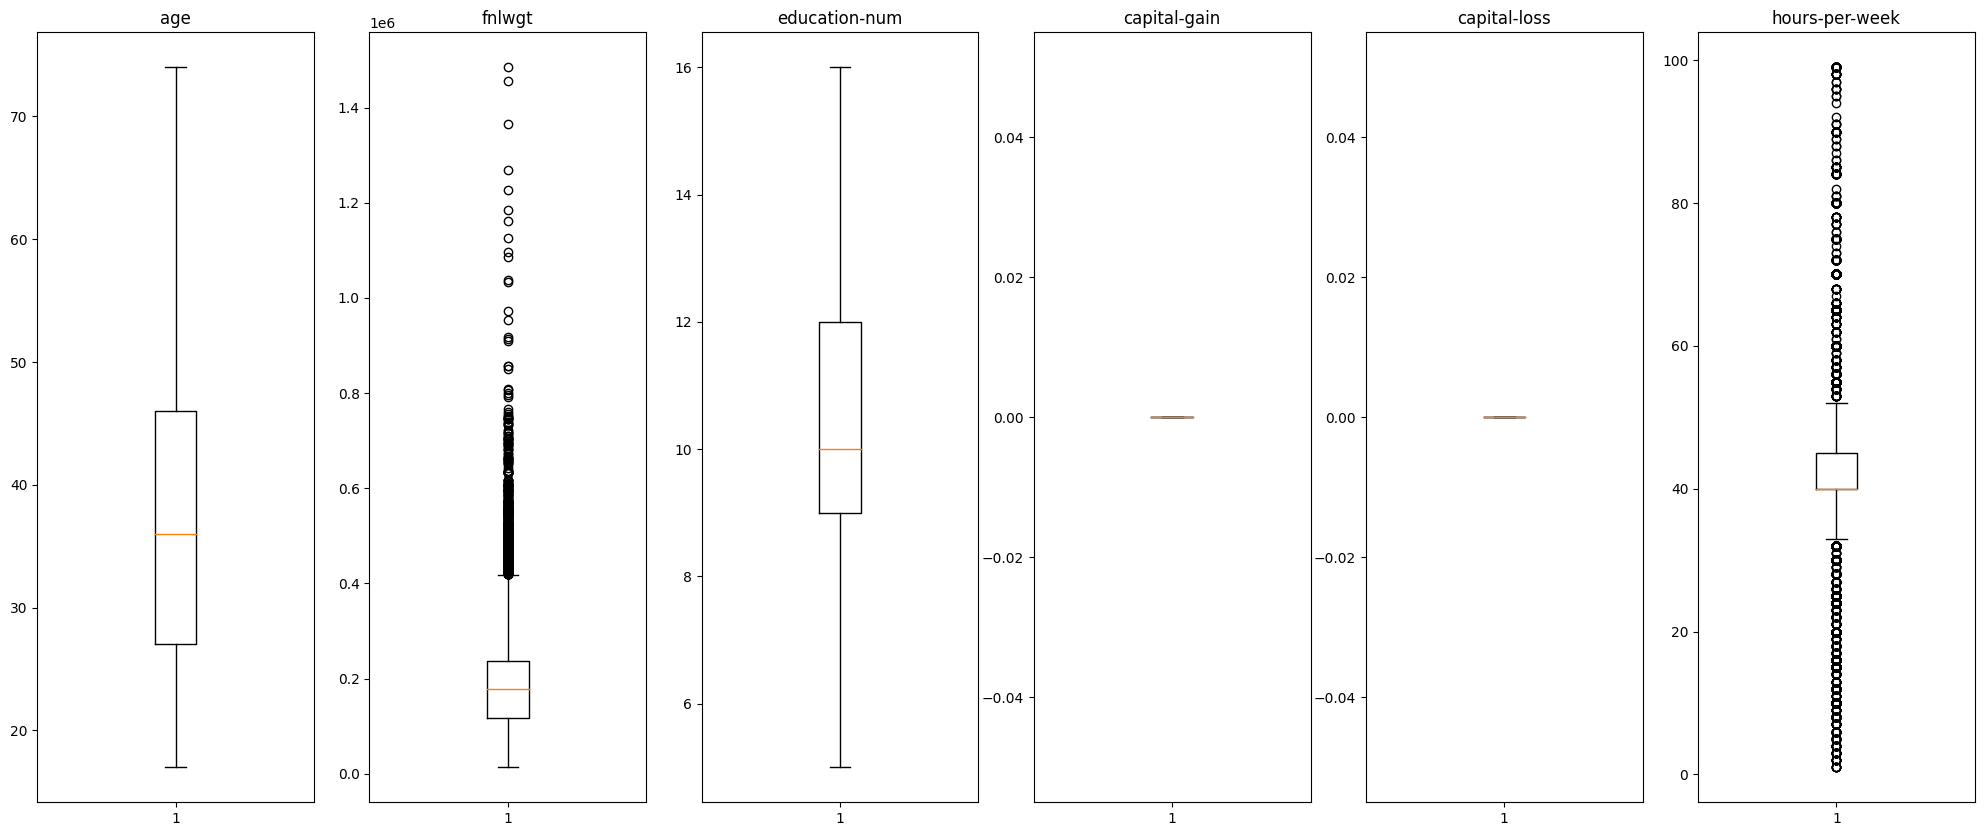

In [ ]:
# 숫자 이상치 탐색
plt.figure(figsize=(25, 10))

res = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
           'hours-per-week']
# 서브플롯 설정
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(25, 10))

# 각 서브플롯에 박스플롯 그리기
for i, var in enumerate(res):
    axes[i].boxplot(data[var])
    axes[i].set_title(var)

plt.show()

In [ ]:
# 범주형 변수 인코딩
data['sex'] = data['sex'].map({'Male': 0, 'Female': 1})

data['income'] = data['income'].map({'<=50K': 0, '>50K': 1})

In [ ]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,capital_diff
1,50.0,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,13,United-States,0,0
2,38.0,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,0,0,0,40,United-States,0,0
3,53.0,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,0,40,United-States,0,0
4,28.0,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,1,0,0,40,Cuba,0,0
5,37.0,Private,284582,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,1,0,0,40,United-States,0,0


In [ ]:
data = data[['age', 'education-num', 'sex', 'capital-gain', 'capital-loss', 'income', 'capital_diff']]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26197 entries, 1 to 32559
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            26197 non-null  float64
 1   education-num  26197 non-null  float64
 2   sex            26197 non-null  int64  
 3   capital-gain   26197 non-null  int64  
 4   capital-loss   26197 non-null  int64  
 5   income         26197 non-null  int64  
 6   capital_diff   26197 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 1.6 MB


In [ ]:
data.head()

,age,education-num,sex,capital-gain,capital-loss,income,capital_diff
1,50.0,13.0,0,0,0,0,0
2,38.0,9.0,0,0,0,0,0
3,53.0,7.0,0,0,0,0,0
4,28.0,13.0,1,0,0,0,0
5,37.0,14.0,1,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# 6. 변수 선택 및 데이터 분리
X = data.drop('income', axis=1)
y = data['income']

# 7. 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)
# X_test_scaled = scaler.transform(X_test)


# 8. 학습 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, y, test_size=0.3, random_state=42)

# 9. 로지스틱 회귀 모델 학습
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# 10. 예측 및 모델 평가
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {round(accuracy,4)}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.826
Confusion Matrix:
[[6101  236]
 [1132  391]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      6337
           1       0.62      0.26      0.36      1523

    accuracy                           0.83      7860
   macro avg       0.73      0.61      0.63      7860
weighted avg       0.80      0.83      0.80      7860

